## Bill Data

In [236]:
import pandas as pd
bill=pd.read_csv('uk_bill_data.csv', sep=',')

In [237]:
bill.shape

(890, 7)

In [238]:
bill.head()

,act_name,date_of_act,amendment,characters_in_act,words_in_act,link_to_act,act_text
0,Finance Act 2019,12th February 2019,FALSE,750386,112867,https://www.legislation.gov.uk/ukpga/2019/1/en...,Most Gracious Sovereign WE; Your Majestys most...
1,Voyeurism (Offences) Act 2019,12th February 2019,FALSE,4448,638,https://www.legislation.gov.uk/ukpga/2019/2/en...,Be it enacted by the Queens most Excellent Maj...
2,Counter-Terrorism and Border Security Act 2019,12th February 2019,FALSE,219375,31598,https://www.legislation.gov.uk/ukpga/2019/3/en...,Be it enacted by the Queens most Excellent Maj...
3,Tenant Fees Act 2019,12th February 2019,FALSE,90209,13780,https://www.legislation.gov.uk/ukpga/2019/4/en...,Be it enacted by the Queens most Excellent Maj...
4,Crime (Overseas Production Orders) Act 2019,12th February 2019,FALSE,39296,5885,https://www.legislation.gov.uk/ukpga/2019/5/en...,Be it enacted by the Queens most Excellent Maj...


In [251]:
req_bill=bill[bill.act_text.str.contains("health")]

In [252]:
req_bill.shape

(241, 7)

In [253]:
req_bill.columns

Index(['act_name', 'date_of_act', 'amendment', 'characters_in_act',
       'words_in_act', 'link_to_act', 'act_text'],
      dtype='object')

In [254]:
req_bill['year']=req_bill['date_of_act'].str.split().str[-1]

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [255]:
req_bill['month']=req_bill['date_of_act'].str.split().str[1]

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [256]:
req_bill_yr=req_bill[req_bill.year.isin(['2016','2017','2018','2019'])]

In [257]:
req_bill_yr.head()

,act_name,date_of_act,amendment,characters_in_act,words_in_act,link_to_act,act_text,year,month
0,Finance Act 2019,12th February 2019,FALSE,750386,112867,https://www.legislation.gov.uk/ukpga/2019/1/en...,Most Gracious Sovereign WE; Your Majestys most...,2019,February
2,Counter-Terrorism and Border Security Act 2019,12th February 2019,FALSE,219375,31598,https://www.legislation.gov.uk/ukpga/2019/3/en...,Be it enacted by the Queens most Excellent Maj...,2019,February
4,Crime (Overseas Production Orders) Act 2019,12th February 2019,FALSE,39296,5885,https://www.legislation.gov.uk/ukpga/2019/5/en...,Be it enacted by the Queens most Excellent Maj...,2019,February
5,Supply and Appropriation (Anticipation and Adj...,15th March 2019,FALSE,138031,16571,https://www.legislation.gov.uk/ukpga/2019/6/en...,Whereas the Commons of the United Kingdom in P...,2019,March
10,Northern Ireland Budget (Anticipation and Adju...,15th March 2019,FALSE,90628,11808,https://www.legislation.gov.uk/ukpga/2019/11/e...,Be it enacted by the Queens most Excellent Maj...,2019,March


Text(0, 0.5, 'Number of bills')

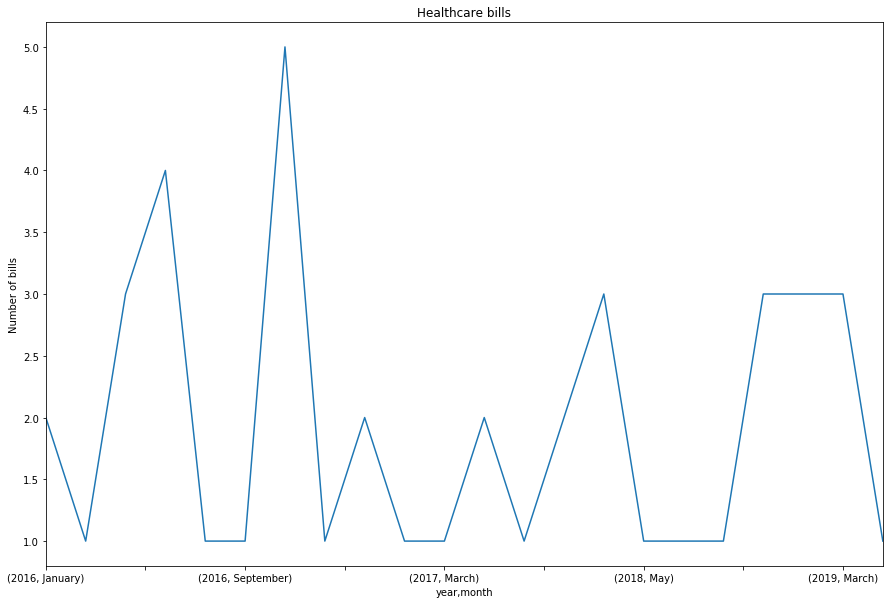

In [269]:
req_bill_yr.groupby(['year','month']).act_name.count().plot(title="Healthcare bills", figsize=(15,10))
plt.ylabel('Number of bills')

In [261]:
req_bill_grp=req_bill_yr.groupby(['year','month']).act_name.count()

In [263]:
req_bill_grp

year  month    
2016  January      2
      July         1
      March        3
      May          4
      November     1
      September    1
2017  April        5
      February     1
      January      2
      July         1
      March        1
      November     2
2018  December     1
      July         2
      March        3
      May          1
      November     1
      September    1
2019  February     3
      July         3
      March        3
      May          1
Name: act_name, dtype: int64

In [211]:
immig_bill=bill[bill.act_text.str.contains("immigrant")]

In [27]:
import matplotlib.pyplot as plt

## London Stock Exchange

In [157]:
lse=pd.read_csv("lse_historical_data.csv", sep=',')

In [158]:
lse.columns

Index(['year', 'month', 'ticker', 'list_date', 'company_name', 'icb_industry',
       'ice_supersector', 'country_of_incorporation', 'market_cap', 'eps',
       'p/e', 'p/s'],
      dtype='object')

In [159]:
lse.icb_industry.unique()

array(['Financial Services', 'Industrial Goods & Services', 'Healthcare',
       'Media', 'Oil & Gas', 'Technology', 'Personal & Household Goods',
       'Construction & Materials', nan, 'Real Estate',
       'Telecommunications', 'Insurance', 'Basic Resources', 'Utilities',
       'Food & Beverage', 'Banks', 'Retail', 'Chemicals',
       'Travel & Leisure', 'Automobiles & Parts',
       'Equity Investment Instruments', 'General Financial',
       'Technology Hardware & Equipment',
       'Real Estate Investment & Services', 'Mining',
       'Oil & Gas Producers', 'Electricity', 'Health Care',
       'Financial Services ', 'Industrial Goods and Services',
       'Health Care  ', 'Energy', 'Automobiles and Parts',
       'Personal Care; Drug and Grocery Stores ',
       'Construction and Materials', 'Real Estate ',
       'Food; Beverage and Tobacco ', 'Consumer Products and Services',
       'Retail ', 'Travel and Leisure', 'Software & Computer Services'],
      dtype=object)

In [160]:
req_lse=lse.dropna(subset=['icb_industry'])

In [161]:
req_lse.icb_industry.unique()

array(['Financial Services', 'Industrial Goods & Services', 'Healthcare',
       'Media', 'Oil & Gas', 'Technology', 'Personal & Household Goods',
       'Construction & Materials', 'Real Estate', 'Telecommunications',
       'Insurance', 'Basic Resources', 'Utilities', 'Food & Beverage',
       'Banks', 'Retail', 'Chemicals', 'Travel & Leisure',
       'Automobiles & Parts', 'Equity Investment Instruments',
       'General Financial', 'Technology Hardware & Equipment',
       'Real Estate Investment & Services', 'Mining',
       'Oil & Gas Producers', 'Electricity', 'Health Care',
       'Financial Services ', 'Industrial Goods and Services',
       'Health Care  ', 'Energy', 'Automobiles and Parts',
       'Personal Care; Drug and Grocery Stores ',
       'Construction and Materials', 'Real Estate ',
       'Food; Beverage and Tobacco ', 'Consumer Products and Services',
       'Retail ', 'Travel and Leisure', 'Software & Computer Services'],
      dtype=object)

In [162]:
req_lse=req_lse[req_lse.icb_industry.str.contains('Health')]

In [163]:
req_lse.columns

Index(['year', 'month', 'ticker', 'list_date', 'company_name', 'icb_industry',
       'ice_supersector', 'country_of_incorporation', 'market_cap', 'eps',
       'p/e', 'p/s'],
      dtype='object')

In [164]:
req_lse.dtypes

year                         int64
month                        int64
ticker                      object
list_date                   object
company_name                object
icb_industry                object
ice_supersector             object
country_of_incorporation    object
market_cap                  object
eps                         object
p/e                         object
p/s                         object
dtype: object

In [165]:
req_lse.head()

,year,month,ticker,list_date,company_name,icb_industry,ice_supersector,country_of_incorporation,market_cap,eps,p/e,p/s
4,2017,11,DDDD,2/18/14,4D PHARMA PLC,Healthcare,Health Care,United Kingdom,221.041717,-,-,-
9,2017,11,ABC,11-03-2005,ABCAM PLC,Healthcare,Health Care,United Kingdom,2011.595728,-,-,-
33,2017,11,AMS,4/30/02,ADVANCED MEDICAL SOLUTIONS GROUP PLC,Healthcare,Health Care,United Kingdom,667.872077,-,-,-
34,2017,11,AVO,08-04-2006,ADVANCED ONCOTHERAPY PLC,Healthcare,Health Care,United Kingdom,22.257178,-,-,-
59,2017,11,APH,12/17/15,ALLIANCE PHARMA PLC,Healthcare,Health Care,United Kingdom,279.841478,-,-,-


In [167]:
req_lse["market_cap"]=req_lse['market_cap'].str.replace(';','')

In [169]:
req_lse['market_cap']=req_lse.market_cap.astype(float)

In [168]:
req_lse.head()

,year,month,ticker,list_date,company_name,icb_industry,ice_supersector,country_of_incorporation,market_cap,eps,p/e,p/s
4,2017,11,DDDD,2/18/14,4D PHARMA PLC,Healthcare,Health Care,United Kingdom,221.041717,-,-,-
9,2017,11,ABC,11-03-2005,ABCAM PLC,Healthcare,Health Care,United Kingdom,2011.595728,-,-,-
33,2017,11,AMS,4/30/02,ADVANCED MEDICAL SOLUTIONS GROUP PLC,Healthcare,Health Care,United Kingdom,667.872077,-,-,-
34,2017,11,AVO,08-04-2006,ADVANCED ONCOTHERAPY PLC,Healthcare,Health Care,United Kingdom,22.257178,-,-,-
59,2017,11,APH,12/17/15,ALLIANCE PHARMA PLC,Healthcare,Health Care,United Kingdom,279.841478,-,-,-


Text(0, 0.5, 'Market Cap')

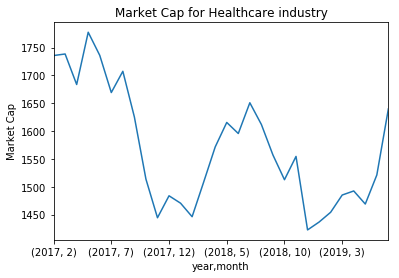

In [270]:
req_lse.groupby(['year','month']).market_cap.mean().plot(title='Market Cap for Healthcare industry')
plt.ylabel('Market Cap')

In [181]:
req_lse_uk=req_lse[req_lse.country_of_incorporation.str.contains('United Kingdom')]

req_lse_others=req_lse[~(req_lse.country_of_incorporation.str.contains('United Kingdom'))]

In [218]:
req_lse_uk.to_csv("D:\Machine Learning\Datathon\CleanData\Market_UK.csv")

In [219]:
req_lse_others.to_csv("D:\Machine Learning\Datathon\CleanData\Market_Others.csv")

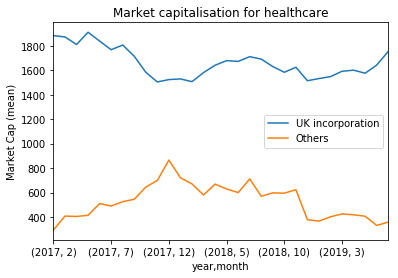

In [274]:
req_lse_uk.groupby(['year','month']).market_cap.mean().plot()
req_lse_others.groupby(['year','month']).market_cap.mean().plot()
plt.title('Market capitalisation for healthcare')
plt.ylabel('Market Cap (mean)')
plt.legend(['UK incorporation','Others'])

## Immigrants

In [220]:
immig=pd.read_csv("immigrant_statistics.csv")

In [221]:
import numpy as np

In [222]:
immig.shape

(47, 265)

In [225]:
immig['Sum']=immig.sum(axis=1)

In [232]:
immig.columns

Index(['Year', 'Quarter', 'AFN', 'AFS', 'AFN.1', 'ACS', 'ACE', 'AEA', 'ASO',
       'ASE',
       ...
       'ACS-VNZ', 'ASE-VTN', 'OTH-VIB', 'AMN-VIU', 'OCE-WAF', 'AFN-WSH',
       'MIE-YMN', 'AFS-ZMB', 'AFS-ZBW', 'Sum'],
      dtype='object', length=266)

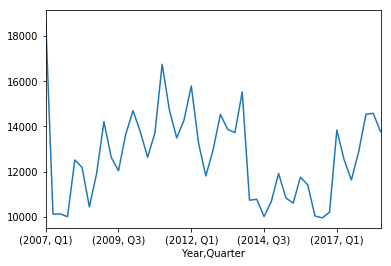

In [276]:
immig.groupby(['Year','Quarter']).Sum.mean().plot()
plt.title('Immigrants trend')
plt.ylabel('')

In [295]:
req_columns=['Year','Quarter','EU1','EU2','EU8','EU1-AUS','EU1-BLG','EU2-BLG','EU8-CZR','EU1-DEN','EU8-EST','EU1-FIN','EU1-FRA','EU1-GER','EU1-GRE','EU8-HNG']

In [289]:
immig_EU=pd.read_csv("immigrant_statistics.csv", usecols=req_columns)

In [290]:
immig_EU.shape

(47, 16)

In [291]:
immig_EU['Sum']=immig_EU.sum(axis=1)

Text(0, 0.5, '')

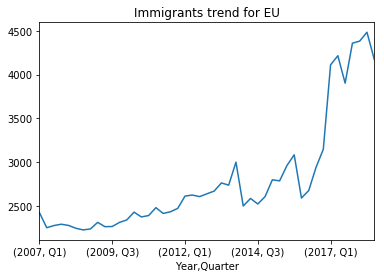

In [293]:
immig_EU.groupby(['Year','Quarter']).Sum.mean().plot()
plt.title('Immigrants trend for EU')
plt.ylabel('')

In [294]:
immig_EU['Others']=immig['Sum']-immig_EU['Sum']

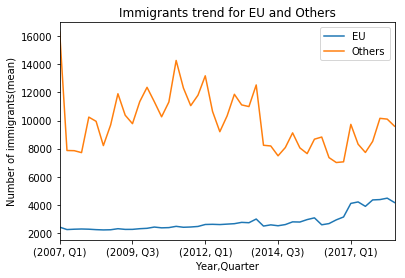

In [300]:
immig_EU.groupby(['Year','Quarter']).Sum.mean().plot()
immig_EU.groupby(['Year','Quarter']).Others.mean().plot()
plt.title('Immigrants trend for EU and Others')
plt.ylabel('Number of immigrants(mean)')
plt.legend(['EU','Others'])

## Correlate Immigrants and Research Scientists

In [302]:
female2 =np.asarray([29914.0,32826.0,39683.0,50454.0,56091.0,48965.0,40982.0,43345.0])
male2 = np.asarray([29070.0,28560.0,27063.0,42432.0,38311.0,50602.0,32288.0,33428.0])

In [303]:
RS=female2+male2

In [319]:
RS.shape

(8,)

In [308]:
immig_EU.shape

(47, 18)

In [321]:
immig_EU.groupby('Year').Sum.mean().shape

(12,)

In [332]:
immig_EU_ReqYr=immig_EU.groupby('Year').Sum.mean()[4:12]

In [354]:
immig_EU.groupby('Year').Others.mean()[4:12]

Year
2011    12357.000000
2012    10838.500000
2013    11622.000000
2014     8001.000000
2015     8374.500000
2016     7567.750000
2017     8572.500000
2018     9950.333333
Name: Others, dtype: float64

In [353]:
immig_Others_ReqYr=pd.

dtype('float64')

In [329]:
import scipy

In [337]:
scipy.correlate(immig_Others_ReqYr, RS)

array([5.84919208e+09])

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

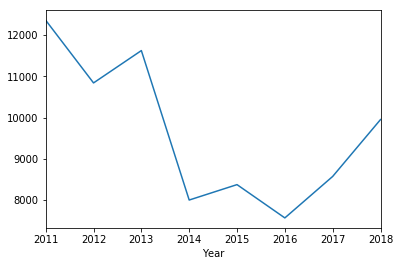

In [339]:
immig_EU.groupby('Year').Others.mean()[4:12].plot()


In [340]:
RS

array([58984., 61386., 66746., 92886., 94402., 99567., 73270., 76773.])

In [341]:
data = [[58984, 2011], [61386, 2012], [66746, 2013],[92886,2014],[94402,2015],[99567,2016],[73270,2017],[76773,2018]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Res_Sct', 'Year']) 

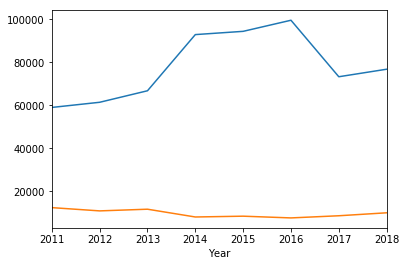

In [344]:
df.groupby('Year').Res_Sct.mean().plot()
immig_EU.groupby('Year').Others.mean()[4:12].plot()

AttributeError: 'Series' object has no attribute 'columns'

In [349]:
df_new['Others']=immig_Others_ReqYr['Others']

KeyError: 'Others'

In [356]:
immig_EU.groupby('Year').Others.mean()[4:12]

Year
2011    12357.000000
2012    10838.500000
2013    11622.000000
2014     8001.000000
2015     8374.500000
2016     7567.750000
2017     8572.500000
2018     9950.333333
Name: Others, dtype: float64

In [357]:
data = [[58984, 12357], [61386, 10838], [66746, 11622],[92886,8001],[94402,8374],[99567,7567],[73270,8572],[76773,9950]]

In [358]:
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Res_Sct', 'Others']) 

In [361]:
df

,Res_Sct,Others
0,58984,12357
1,61386,10838
2,66746,11622
3,92886,8001
4,94402,8374
5,99567,7567
6,73270,8572
7,76773,9950


Text(0, 0.5, 'Research Scientists')

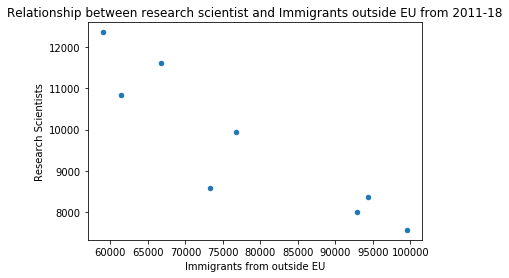

In [370]:
df.plot(x ='Res_Sct', y='Others',kind='scatter')
plt.title("Relationship between research scientist and Immigrants outside EU from 2011-18")
plt.xlabel("Immigrants from outside EU")
plt.ylabel("Research Scientists")